## HOUSE PRICE PREDICTION

IMPORTING LIBRARIES

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

LOADING DATA SET

In [335]:
data=pd.read_csv("housing.csv")

In [336]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


DATA EXPLORATION

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [338]:
data.dropna(inplace=True)

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [340]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [341]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [342]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [343]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [344]:
train_data=x_train.join(y_train)

In [345]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4751,-118.32,34.04,39.0,1294.0,330.0,1140.0,313.0,2.2554,<1H OCEAN,165000.0
17761,-121.83,37.34,21.0,6404.0,1232.0,6047.0,1235.0,4.2098,<1H OCEAN,193400.0
7476,-118.20,33.93,36.0,1191.0,345.0,1193.0,295.0,2.5185,<1H OCEAN,138800.0
17624,-121.95,37.26,10.0,3611.0,803.0,1599.0,716.0,5.2000,<1H OCEAN,248700.0
16498,-120.97,37.84,28.0,2368.0,430.0,1231.0,403.0,2.8830,INLAND,141900.0
...,...,...,...,...,...,...,...,...,...,...
8646,-118.40,33.87,45.0,2093.0,497.0,842.0,472.0,6.3231,<1H OCEAN,500001.0
6789,-118.16,34.09,52.0,1722.0,448.0,1122.0,425.0,3.1204,<1H OCEAN,224000.0
13218,-117.68,34.00,5.0,3761.0,580.0,2335.0,648.0,5.7338,INLAND,225400.0
3472,-118.49,34.29,26.0,4516.0,611.0,1714.0,581.0,9.2873,<1H OCEAN,431800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

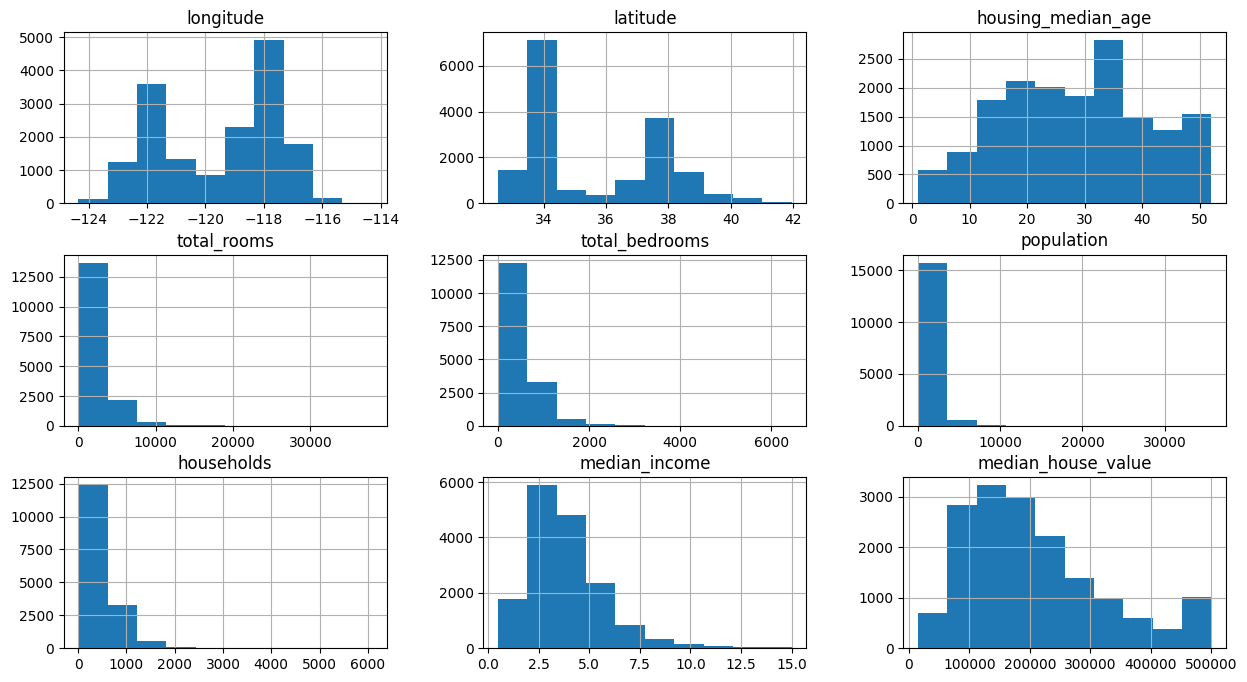

In [346]:
train_data.hist(figsize=(15,8))

In [347]:
train_data.corr()

<ipython-input-347-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925092,-0.103524,0.043148,0.066634,0.097577,0.052961,-0.018327,-0.046790
latitude,-0.925092,1.000000,0.005709,-0.035491,-0.065173,-0.107579,-0.069447,-0.078326,-0.144046
housing_median_age,-0.103524,0.005709,1.000000,-0.361161,-0.318317,-0.292307,-0.300571,-0.113518,0.110282
total_rooms,0.043148,-0.035491,-0.361161,1.000000,0.930452,0.851757,0.917989,0.193196,0.129284
total_bedrooms,0.066634,-0.065173,-0.318317,0.930452,1.000000,0.873946,0.978978,-0.012741,0.046426
population,0.097577,-0.107579,-0.292307,0.851757,0.873946,1.000000,0.904592,0.000742,-0.028213
households,0.052961,-0.069447,-0.300571,0.917989,0.978978,0.904592,1.000000,0.008181,0.061963
median_income,-0.018327,-0.078326,-0.113518,0.193196,-0.012741,0.000742,0.008181,1.000000,0.685413
median_house_value,-0.046790,-0.144046,0.110282,0.129284,0.046426,-0.028213,0.061963,0.685413,1.000000


<ipython-input-348-61c25898b3d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

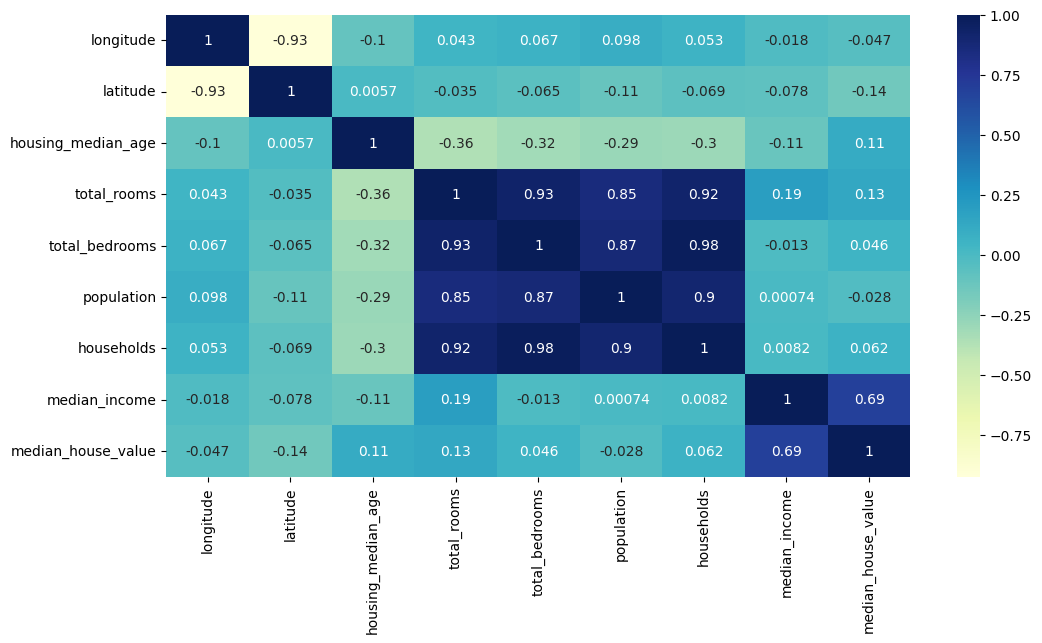

In [348]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

DATA PREPROCESSING

In [349]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

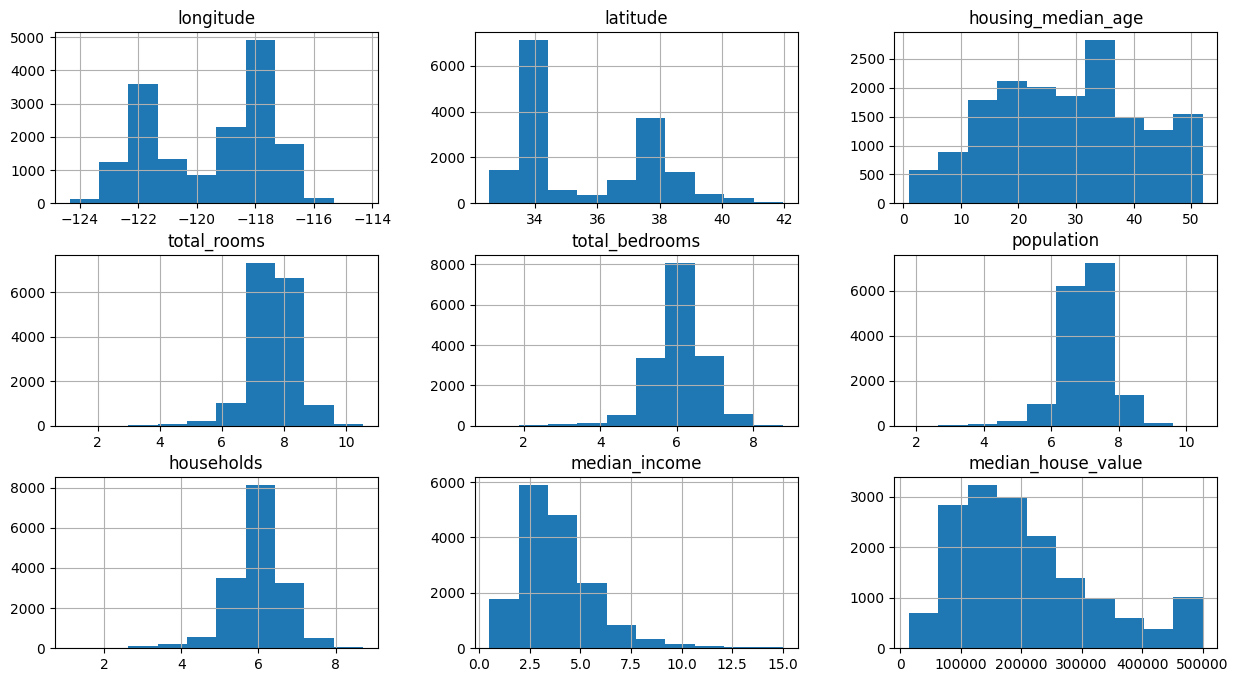

In [350]:
train_data.hist(figsize=(15,8))

In [351]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [321]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18762,-122.25,40.66,15.0,7.927324,6.304449,7.261225,6.226537,3.6413,108500.0,0,1,0,0,0
19398,-120.93,37.74,37.0,7.579168,5.998937,7.143618,5.986452,2.3023,91900.0,0,1,0,0,0
16830,-122.54,37.62,35.0,7.301148,5.627621,6.617403,5.541264,4.4286,262100.0,0,0,0,0,1
7715,-118.12,33.94,35.0,7.503290,5.749393,6.716595,5.758902,5.2485,323800.0,1,0,0,0,0
12315,-116.42,33.51,26.0,5.231109,3.891820,4.634729,3.688879,2.5625,103100.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-122.27,37.80,16.0,6.902743,5.973810,6.685861,5.894403,2.0938,162500.0,0,0,0,1,0
7044,-118.04,33.95,35.0,7.573531,5.880533,7.113142,5.886104,5.2162,171900.0,1,0,0,0,0
11122,-117.92,33.84,45.0,7.610853,5.978886,7.346010,5.934894,4.6111,223000.0,1,0,0,0,0
5863,-118.34,34.19,47.0,7.451242,5.840642,6.727432,5.814131,4.1923,231200.0,1,0,0,0,0


<Axes: >

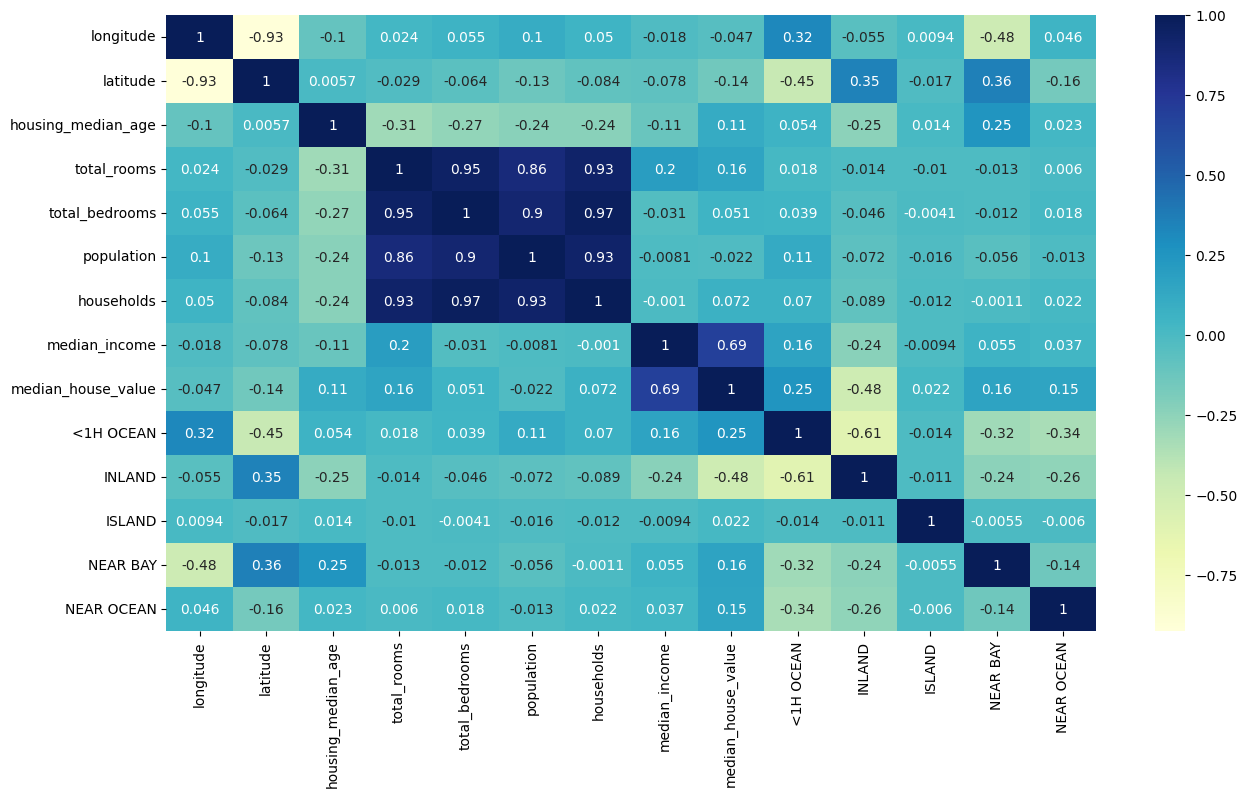

In [352]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

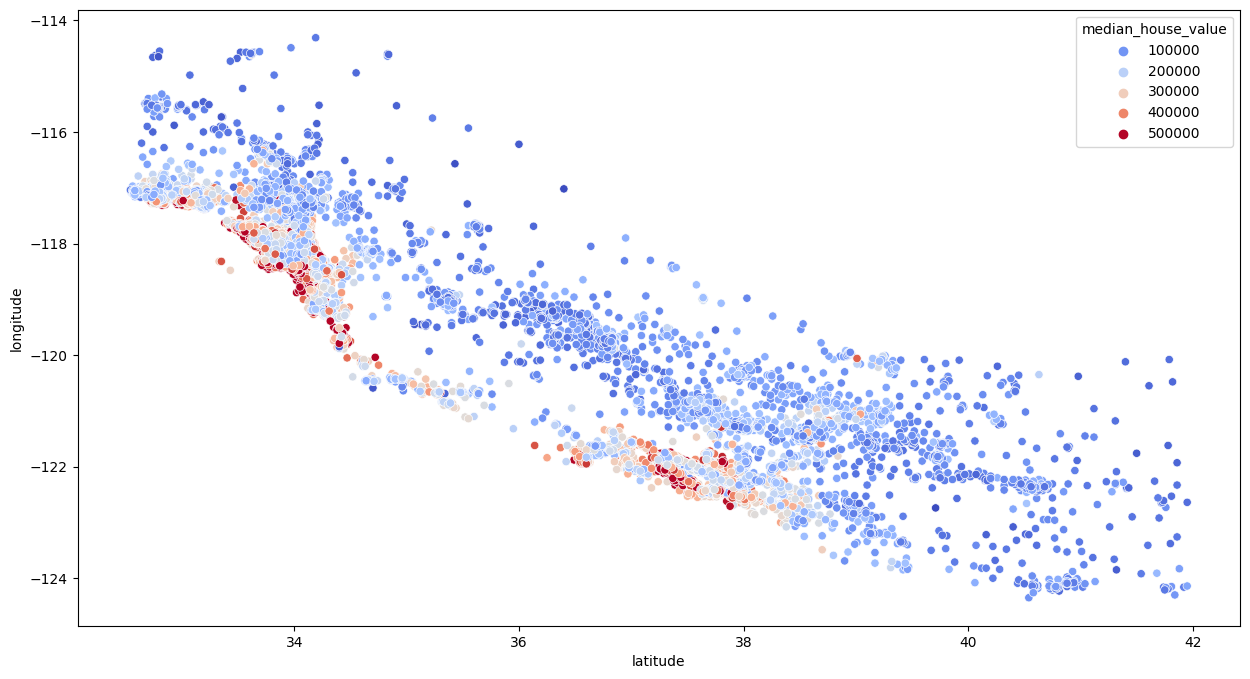

In [353]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

FEATURE ENGINEERING

In [354]:
train_data['bedroom_ratio']= train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms'] / train_data['households']

<Axes: >

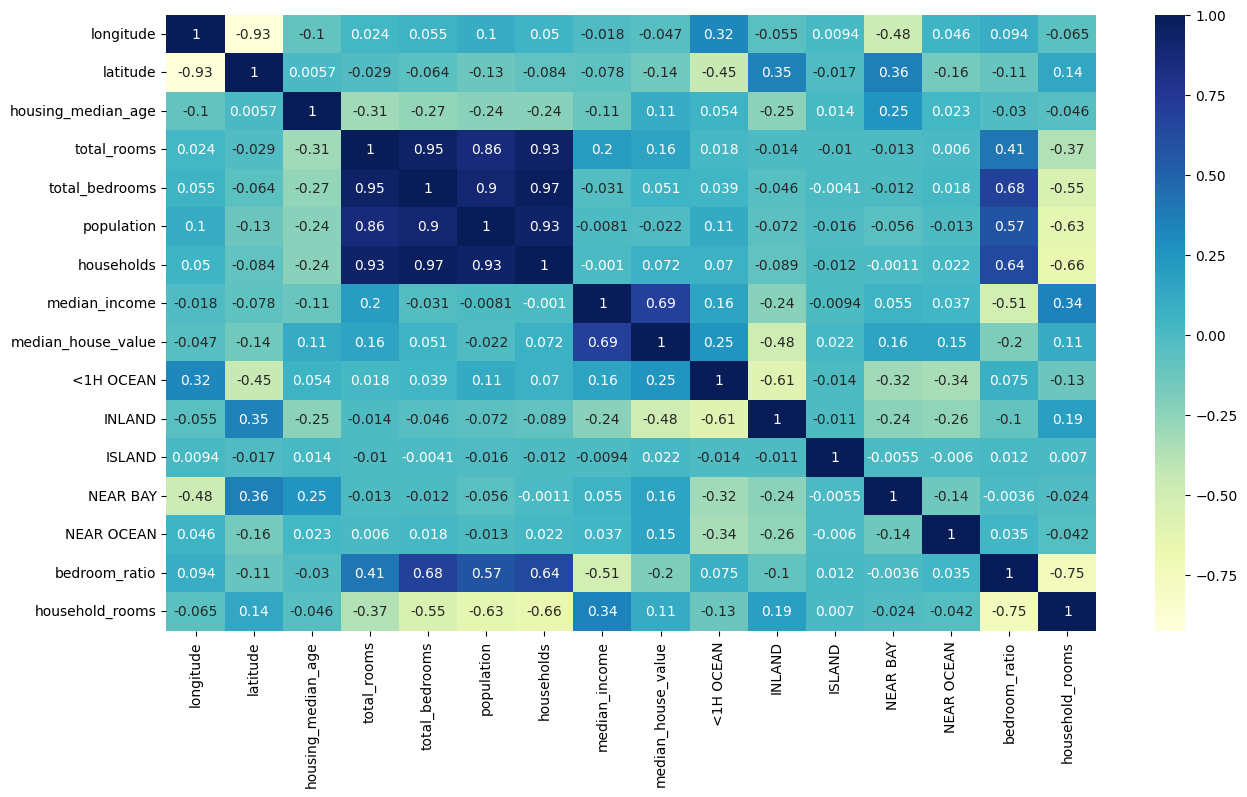

In [355]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

LINEAR REGRESSION

In [356]:
from sklearn.linear_model import LinearRegression


x_train,y_train=train_data.drop(['median_house_value'],axis=1), train_data ['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [357]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms'] / test_data['households']



In [358]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data ['median_house_value']


In [360]:
reg.score(x_test, y_test)

0.6884612295510862

RANDOM FOREST REGRESSOR

In [361]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)


RandomForestRegressor()

In [362]:
forest.score(x_test,y_test)

0.822762697428945